# WeatherPy
----

### Analysis

* There is a clear correlation bewteen latitude and temperature. The lower latitudes have higher temperatures and vice versa.
* When looking at the latitunde against either cloudiness or humidity it doesn't seem to show any trends.
* The method for randominly choosing cities may be providing a larger number of cities in the northen hemisphere, because of the higher population (more than 85% of the worlds population is in the northern hemisphere). It may be worth re-designing the method for randominly choosing cities in such way that the data contains a similar number of cities in each hemisphere.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, choosr size of 1500 becuase there will be some repetition and repeated cities will be removed afterwards
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count, need to be at least 500
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#setting up URL for openwathermap.org calls
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

#this list will hold the jsons with the weather data for each city
city_data = []

#Print header for data
print("beginning Data Retrieval     ")
print("----------------------------")

#set up counter for the cities loop
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + city
        
    #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
        pass
        

beginning Data Retrieval     
----------------------------
Processing Record 1 | puerto escondido
Processing Record 2 | banamba
Processing Record 3 | qaanaaq
Processing Record 4 | richards bay
Processing Record 5 | punta arenas
Processing Record 6 | mosquera
Processing Record 7 | barentsburg
City barentsburg not found. Skipping to next city.
Processing Record 8 | falealupo
City falealupo not found. Skipping to next city.
Processing Record 9 | hermanus
Processing Record 10 | mataura
Processing Record 11 | yellowknife
Processing Record 12 | bayonet point
Processing Record 13 | rikitea
Processing Record 14 | fushe-kruje
Processing Record 15 | bluff
Processing Record 16 | quatre cocos
Processing Record 17 | bambous virieux
Processing Record 18 | christchurch
Processing Record 19 | airai
Processing Record 20 | cape town
Processing Record 21 | byron bay
Processing Record 22 | guerrero negro
Processing Record 23 | jamestown
Processing Record 24 | cosala
City cosala not found. Skipping to next

Processing Record 220 | mogadishu
Processing Record 221 | petropavlovsk-kamchatskiy
Processing Record 222 | mys shmidta
City mys shmidta not found. Skipping to next city.
Processing Record 223 | esperance
Processing Record 224 | mwinilunga
Processing Record 225 | sabana de torres
Processing Record 226 | mar del plata
Processing Record 227 | carutapera
Processing Record 228 | ciulnita
Processing Record 229 | hamilton
Processing Record 230 | havre-saint-pierre
Processing Record 231 | acapulco
Processing Record 232 | tual
Processing Record 233 | ouango
Processing Record 234 | bud
Processing Record 235 | champerico
Processing Record 236 | katsuura
Processing Record 237 | oussouye
Processing Record 238 | fort saint john
City fort saint john not found. Skipping to next city.
Processing Record 239 | dikson
Processing Record 240 | constitucion
Processing Record 241 | kysyl-syr
Processing Record 242 | stabat
Processing Record 243 | semenivka
Processing Record 244 | bonoua
Processing Record 245 

Processing Record 437 | bonavista
Processing Record 438 | ilo
Processing Record 439 | topchikha
Processing Record 440 | seversk
Processing Record 441 | concordia
Processing Record 442 | severo-kurilsk
Processing Record 443 | coihaique
Processing Record 444 | the valley
Processing Record 445 | leshukonskoye
Processing Record 446 | kodinsk
Processing Record 447 | gayeri
Processing Record 448 | elesbao veloso
Processing Record 449 | ixtapa
Processing Record 450 | eenhana
Processing Record 451 | iracoubo
Processing Record 452 | iskateley
Processing Record 453 | axim
Processing Record 454 | vizinga
Processing Record 455 | daru
Processing Record 456 | lavrentiya
Processing Record 457 | alpatovo
Processing Record 458 | verkhnevilyuysk
Processing Record 459 | san juan
Processing Record 460 | ambikapur
Processing Record 461 | deniliquin
Processing Record 462 | borazjan
Processing Record 463 | omboue
Processing Record 464 | harnai
Processing Record 465 | shillong
Processing Record 466 | laguna d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# convert array/json into df
city_data_pd = pd.DataFrame(city_data)

# get columns from df and place them into lists
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
with open('city_data.csv', mode='w') as output_data_file:
    city_data_pd.to_csv(output_data_file, index_label="City_ID")


#Show Record Count
city_data_pd.count()


City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Max Temp      553
Wind Speed    553
lng           553
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,puerto escondido,5,MX,1542429600,69,15.86,77.00,8.05,-97.07
1,banamba,8,ML,1542433587,56,13.55,69.02,3.94,-7.45
2,qaanaaq,20,GL,1542433587,100,77.48,-10.14,5.39,-69.36
3,richards bay,80,ZA,1542433588,79,-28.77,76.49,13.22,32.06
4,punta arenas,75,CL,1542430800,65,-53.16,41.00,10.29,-70.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

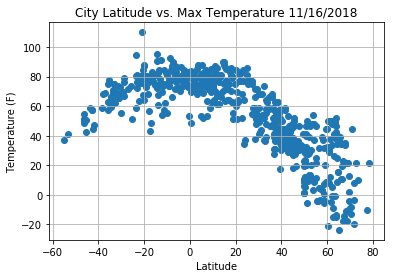

In [7]:
# Bulid scatter plot for latitue vs temperature

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Max Temp'])
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")


#### Latitude vs. Humidity Plot


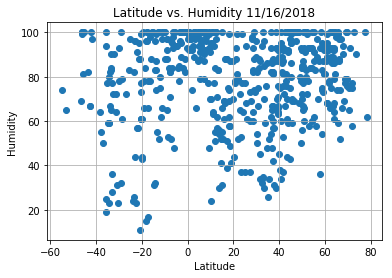

In [8]:
# Bulid scatter plot for Latitude vs. Humidity Plot

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Humidity'])
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Humidity.png")


#### Latitude vs. Cloudiness Plot

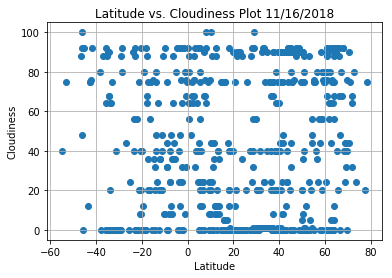

In [9]:
# Bulid scatter plot for Latitude vs. Cloudiness Plot

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Cloudiness'])
plt.title(f"Latitude vs. Cloudiness Plot {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Cloudiness.png")


#### Latitude vs. Wind Speed Plot

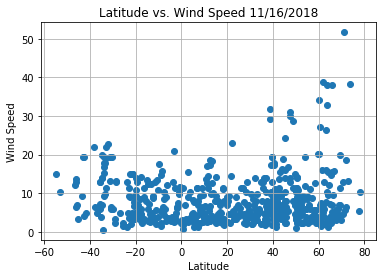

In [10]:
# Bulid scatter plot for Latitude vs. Wind Speed 

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Wind Speed'])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Wind.png")
